In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4
import textblob
import seaborn as sns
import os

## Preprocessing

In [218]:
df_br = pd.read_csv("data/blade-runner-2049_fixed.csv")
df_d = pd.read_csv("data/drive-2011_fixed.csv")
df_fc = pd.read_csv("data/fight-club_fixed.csv")
df_ap = pd.read_csv("data/american-psycho_fixed.csv")
dfs = [df_br, df_d, df_fc, df_ap]

In [219]:
print("before removing rows without ratings or date:", [d.shape[0] for d in dfs], '\ntotal:', sum([d.shape[0] for d in dfs]))

before removing rows without ratings or date: [9296, 9558, 9048, 9279] 
total: 37181


In [220]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].dropna(subset=['Rating']).copy()
    dfs[i]['Rating'] = dfs[i]['Rating'].astype(int)
    dfs[i] = dfs[i].dropna(subset=['Date']).copy()
    dfs[i] = dfs[i][dfs[i]['Date'] >= '2011-01-01']


In [221]:
df = pd.concat(dfs)
df.to_csv("data/all_reviews.csv", index=False)
print("after removing:", [d.shape[0] for d in dfs], '\ntotal:', df.shape[0])

after removing: [8569, 8027, 7649, 8235] 
total: 32480


## Data Visualization with Histograms

### Histograms of Review Ratings

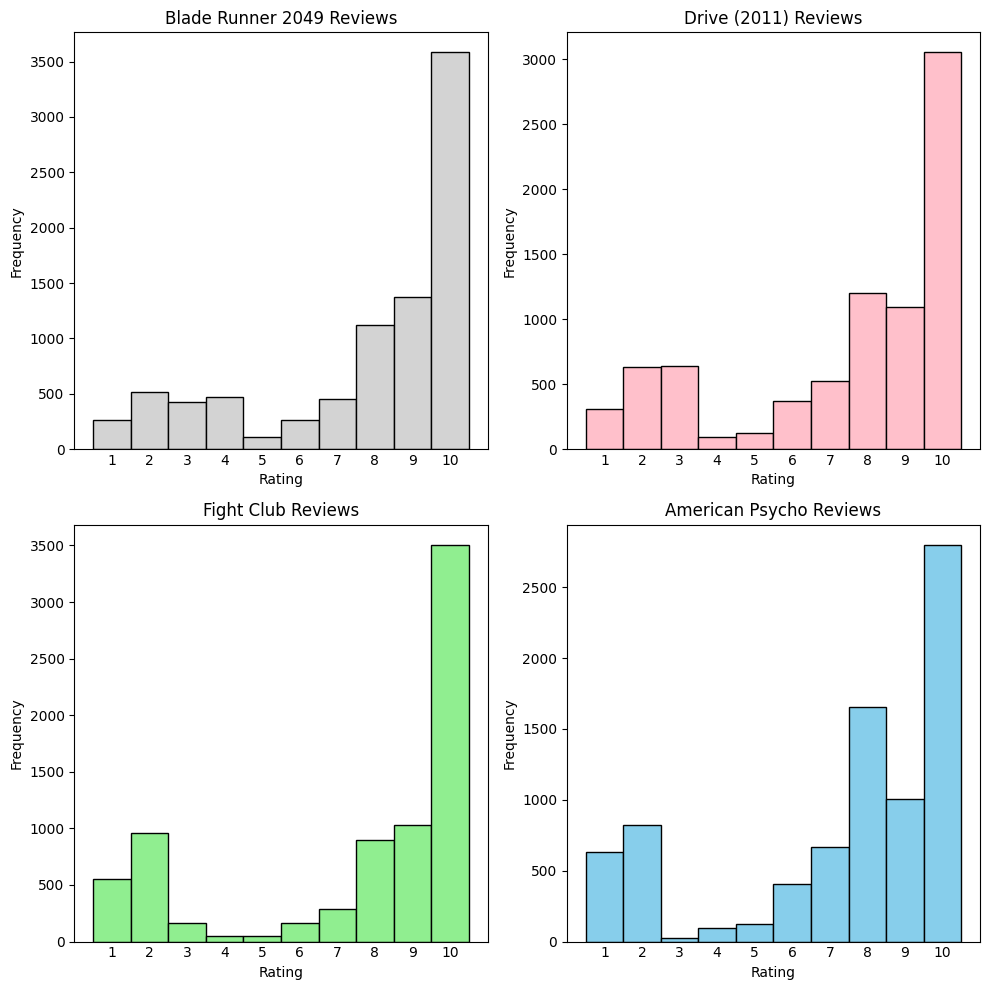

In [222]:
plt.figure(figsize=(10, 10))

x_ticks = list(range(1, 11))

plt.subplot(2, 2, 1)
plt.hist(dfs[0]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='lightgray')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Blade Runner 2049 Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(dfs[1]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='pink')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Drive (2011) Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dfs[2]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='lightgreen')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Fight Club Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dfs[3]['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='skyblue')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('American Psycho Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

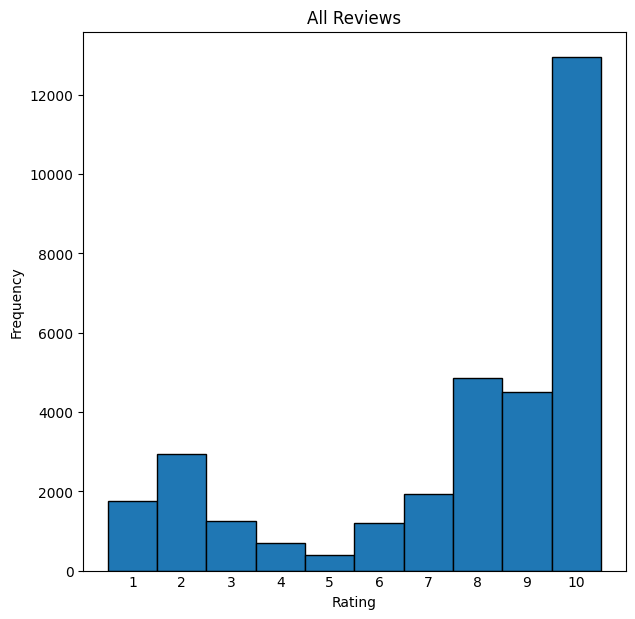

In [223]:
plt.figure(figsize=(7, 7))

x_ticks = list(range(1, 11))

plt.hist(df['Rating'], bins=range(1, 12), edgecolor='black', align='left')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('All Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

### Histograms of Review Dates

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC') ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


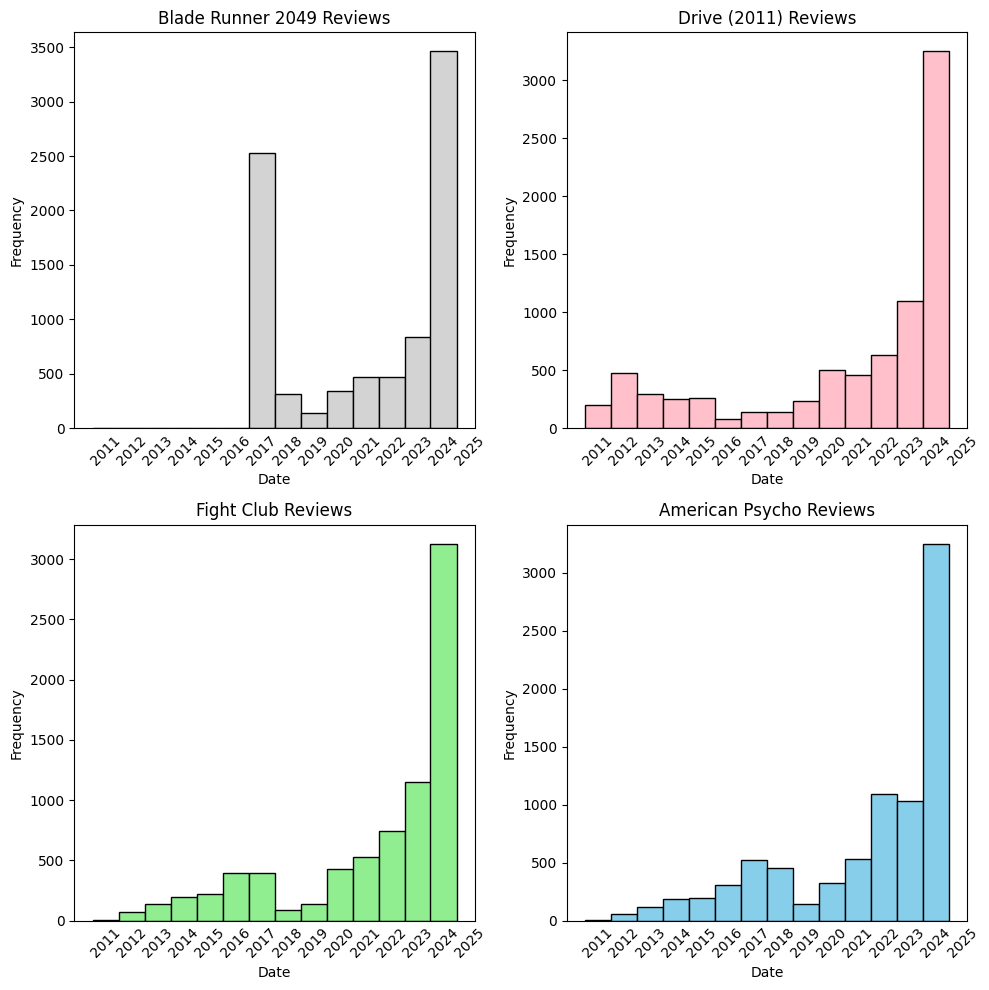

In [224]:
for i in range(len(dfs)):
    dfs[i]['Date'] = pd.to_datetime(dfs[i]['Date'])

# Define the date range and bins for the histogram
date_bins = pd.date_range(start='2010-01-01', end='2025-01-01', freq='Y')
date_labels = [str(year) for year in range(2011, 2026)]
print(date_bins, date_labels)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.hist(dfs[0]['Date'], bins=date_bins, edgecolor='black', color='lightgray', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Blade Runner 2049 Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(dfs[1]['Date'], bins=date_bins, edgecolor='black', color='pink', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Drive (2011) Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dfs[2]['Date'], bins=date_bins, edgecolor='black', color='lightgreen', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Fight Club Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dfs[3]['Date'], bins=date_bins, edgecolor='black', color='skyblue', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('American Psycho Reviews')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC') ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


<Figure size 800x800 with 0 Axes>

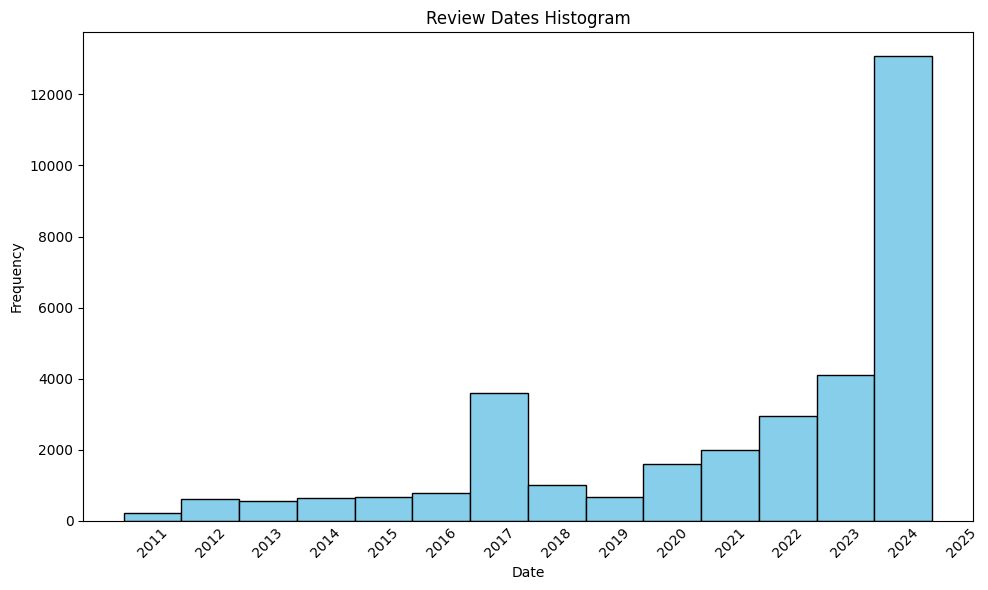

In [225]:
plt.close()
plt.figure(figsize=(8, 8))

df['Date'] = pd.to_datetime(df['Date'])

# Define the date range and bins for the histogram
date_bins = pd.date_range(start='2010-01-01', end='2025-01-01', freq='Y')
date_labels = [str(year) for year in range(2011, 2026)]
print(date_bins, date_labels)

plt.figure(figsize=(10, 6))

plt.hist(df['Date'], bins=date_bins, edgecolor='black', color='skyblue', align='left')
plt.xticks(date_bins, date_labels, rotation=45)
plt.gca().tick_params(axis='x', length=0)
plt.title('Review Dates Histogram')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Sentiment Analysis with Vader

In [226]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [227]:
df = pd.read_csv("data/all_reviews.csv")

In [228]:
df = df.reset_index().rename(columns={'index': 'Id'})

In [229]:
vader_a = SentimentIntensityAnalyzer()

In [230]:
res = {}
for i, row in tqdm(df.iterrows()):
    review = row['Review']
    rev_id = row['Id']
    res[rev_id] = vader_a.polarity_scores(review)

0it [00:00, ?it/s]

In [231]:
vaders = pd.DataFrame(res).T

In [232]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [233]:
vaders

,Id,neg,neu,pos,compound,Date,Review,Rating
0,0,0.000,0.760,0.240,0.9118,2024-06-13,A well shot film with great acting that falls ...,8
1,1,0.000,1.000,0.000,0.0000,2024-06-13,THIS IS CINEMA!!! 👑🗣,10
2,2,0.000,1.000,0.000,0.0000,2024-06-13,why are the barcodes in the eye. WHY.,6
3,3,0.000,0.650,0.350,0.8658,2022-12-17,"It's a great film, definitely a worthy follow-...",9
4,4,0.000,0.530,0.470,0.7964,2024-06-13,it’s a good movie i love ryan gosling and ana ...,6
...,...,...,...,...,...,...,...,...
32475,32475,0.000,1.000,0.000,0.0000,2022-04-29,i saw a 60 second clip of this movie on my fyp...,2
32476,32476,0.512,0.488,0.000,-0.2732,2022-04-29,"I got bored, quickly.",2
32477,32477,0.000,0.673,0.327,0.5984,2022-04-27,Overated as balls got more enjoyment from ball...,2
32478,32478,0.115,0.705,0.180,0.5719,2022-04-26,There was a lot of unnecessary things that too...,2


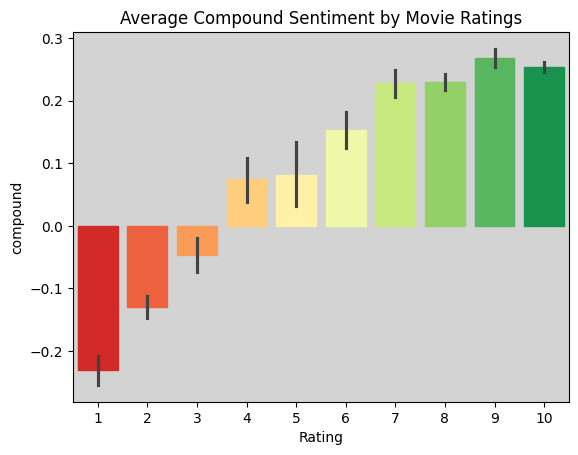

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title("Average Compound Sentiment by Movie Ratings")
colors = sns.color_palette("RdYlGn", len(vaders['Rating'].unique()))

for i, bar in enumerate(ax.patches):
    rating_index = i % len(vaders['Rating'].unique())
    bar.set_color(colors[rating_index])

ax.set_facecolor('lightgray')
plt.show()

## Comparison of Vader and two RoBERTa models on few examples

In [235]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

new twitter roberta base sentiment

In [236]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/home/agata/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification m

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

In [238]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    encoded_text.to(device)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

previous twitter roberta base sentiment

In [ ]:
MODEL2 = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer2 = AutoTokenizer.from_pretrained(MODEL2)
model2 = AutoModelForSequenceClassification.from_pretrained(MODEL2)
device2 = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2.to(device2)

In [240]:
def polarity_scores_roberta2(example):
    encoded_text = tokenizer2(example, return_tensors='pt')
    encoded_text.to(device2)
    output = model2(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

examples selected for testing

In [241]:
examples = df.iloc[1][['Review']]
examples = pd.read_csv('data/examples.csv')
examples

,Date,Review,Rating
0,2024-06-13,THIS IS CINEMA!!! 👑🗣,10.0
1,2024-06-11,What,7.0
2,2024-06-08,I need to lie down,10.0
3,2024-05-30,wish u could rate it higher. everything so fir...,10.0
4,2022-10-01,his morning routine is so comical it’s slay,2.0
5,2024-06-12,"Hey, Paul! AAAAAGGH!!!",8.0
6,2024-06-13,holy shit,10.0
7,2024-06-13,“Put a gun to my head and paint the walls with...,10.0
8,2024-05-05,terrorism!!! :),8.0


In [242]:
for i, example in examples.iterrows():
    rev = example[1]
    rating = example[2]
    print("="*70)
    print(rev, rating)
    print('vader', vader_a.polarity_scores(rev))
    print('roberta latest', polarity_scores_roberta(rev))
    print('roberta older', polarity_scores_roberta2(rev))
    print()
    # print("=" * 70)

THIS IS CINEMA!!! 👑🗣 10.0
vader {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
roberta latest {'roberta_neg': 0.0089774905, 'roberta_neu': 0.10033583, 'roberta_pos': 0.89068663}
roberta older {'roberta_neg': 0.026134789, 'roberta_neu': 0.3406557, 'roberta_pos': 0.63320947}

What 7.0
vader {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
roberta latest {'roberta_neg': 0.15103911, 'roberta_neu': 0.4420851, 'roberta_pos': 0.4068758}
roberta older {'roberta_neg': 0.34850374, 'roberta_neu': 0.5307365, 'roberta_pos': 0.12075974}

I need to lie down 10.0
vader {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
roberta latest {'roberta_neg': 0.18555646, 'roberta_neu': 0.67481816, 'roberta_pos': 0.13962533}
roberta older {'roberta_neg': 0.47367078, 'roberta_neu': 0.47784564, 'roberta_pos': 0.048483618}

wish u could rate it higher. everything so fire 🔥🔥🔥🔥😭🔥😭😭🔥🔥🔥🔥🔥🔥 10.0
vader {'neg': 0.243, 'neu': 0.546, 'pos': 0.211, 'compound': -0.1069}
roberta latest {'roberta_neg': 0.01622333

In [241]:
polarity_scores_roberta(example)

{'roberta_neg': 0.0089774905,
 'roberta_neu': 0.10033583,
 'roberta_pos': 0.89068663}

In [ ]:
polarity_scores_roberta2(example)

In [ ]:
res = {}
for i, row in tqdm(df.iterrows()):
    try:
        review = row['Review']
        rev_id = row['Id']
        vader_res = vader_a.polarity_scores(review)
        vader_res_rename = {}
        for key, value in vader_res.items():
            vader_res_rename[f"vader_{key}"] = value
        roberta_res = polarity_scores_roberta(review)
        both = {**vader_res_rename, **roberta_res}
        res[rev_id] = both
    except RuntimeError:
        print(f'Broke for id {rev_id}')

In [256]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
print(results_df.shape[0])

In [ ]:
# save results to a csv file
results_df.to_csv("data/results2.csv", index=False)

## Comparison of Models: RoBERTa vs. VADER
Analysis On a Whole Dataset

In [7]:
res3 = pd.read_csv("data/results2.csv")
res3.shape[0]

32480

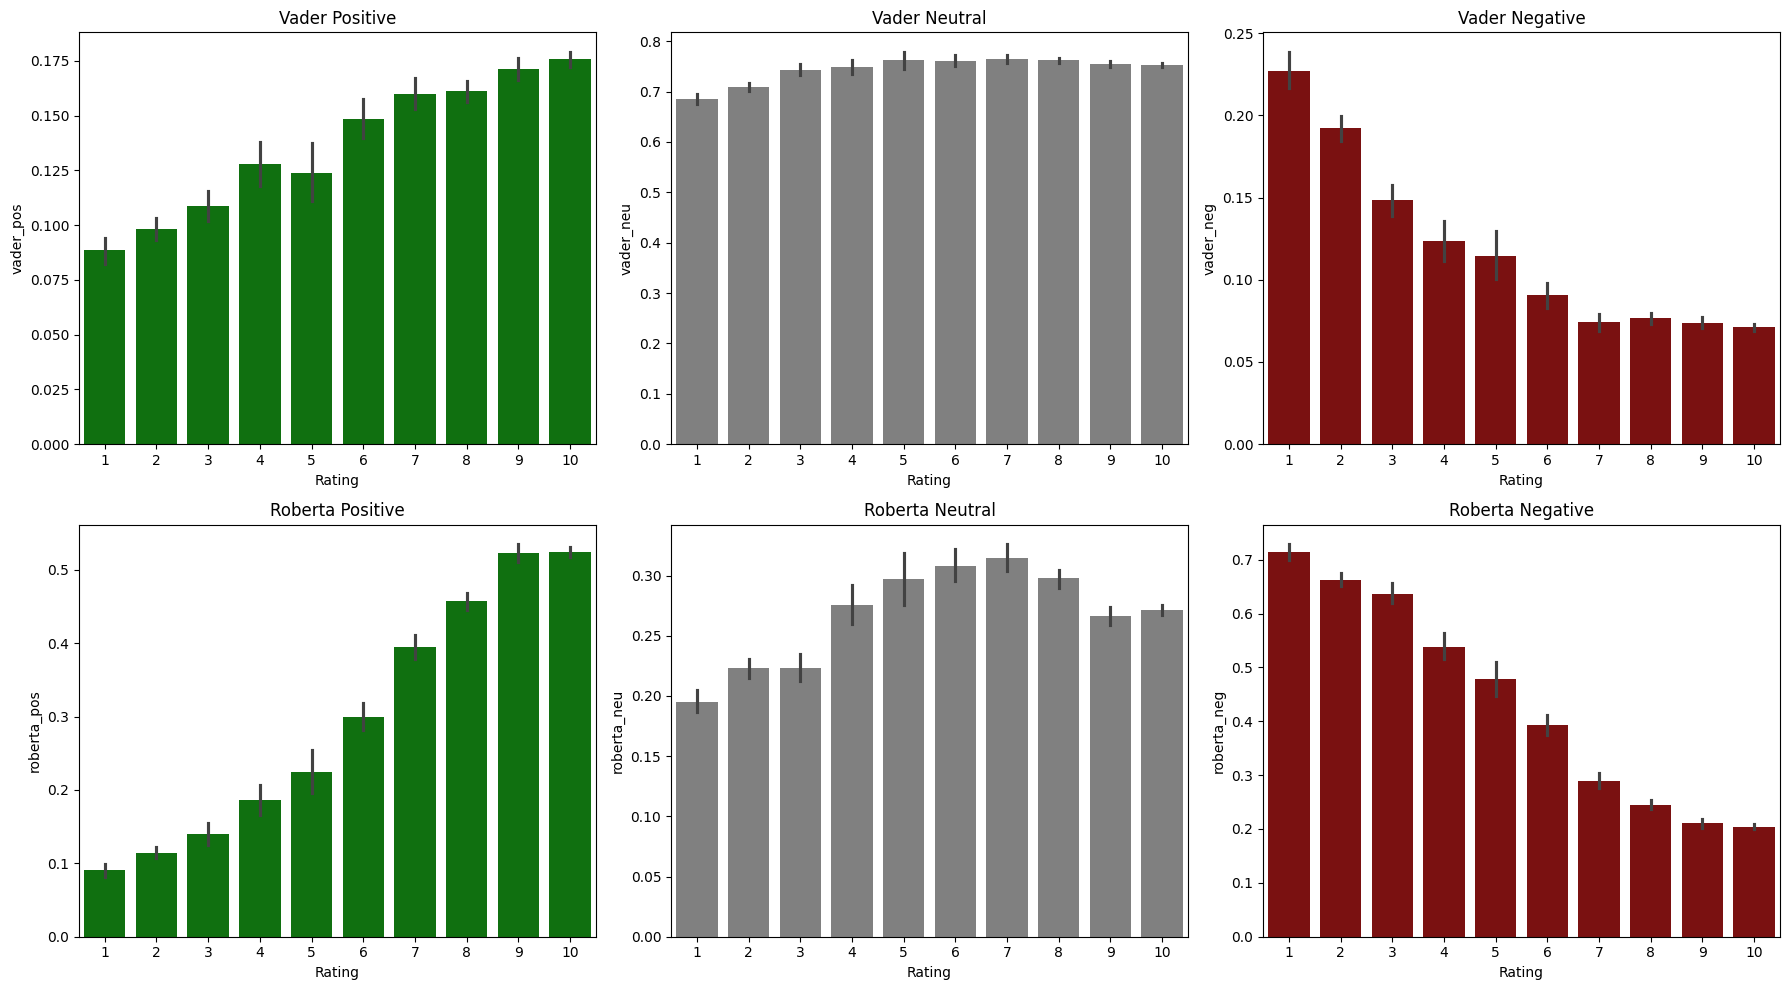

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plotting Vader Positive
sns.barplot(data=res3, x='Rating', y='vader_pos', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Vader Positive')
# axs[0, 0].set_ylim(0, 0.45)

# Plotting Vader Neutral
sns.barplot(data=res3, x='Rating', y='vader_neu', ax=axs[0, 1], color='gray')
axs[0, 1].set_title('Vader Neutral')
# axs[0, 1].set_ylim(0, 0.8)

# Plotting Vader Negative
sns.barplot(data=res3, x='Rating', y='vader_neg', ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Vader Negative')
# axs[0, 2].set_ylim(0, 0.75)

# Plotting Roberta Positive
sns.barplot(data=res3, x='Rating', y='roberta_pos', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Roberta Positive')
# axs[1, 0].set_ylim(0, 0.45)

# Plotting Roberta Neutral
sns.barplot(data=res3, x='Rating', y='roberta_neu', ax=axs[1, 1], color='gray')
axs[1, 1].set_title('Roberta Neutral')
# axs[1, 1].set_ylim(0, 0.8)

# Plotting Roberta Negative
sns.barplot(data=res3, x='Rating', y='roberta_neg', ax=axs[1, 2], color='darkred')
axs[1, 2].set_title('Roberta Negative')
# axs[1, 2].set_ylim(0, 0.75)

plt.tight_layout()
plt.show()

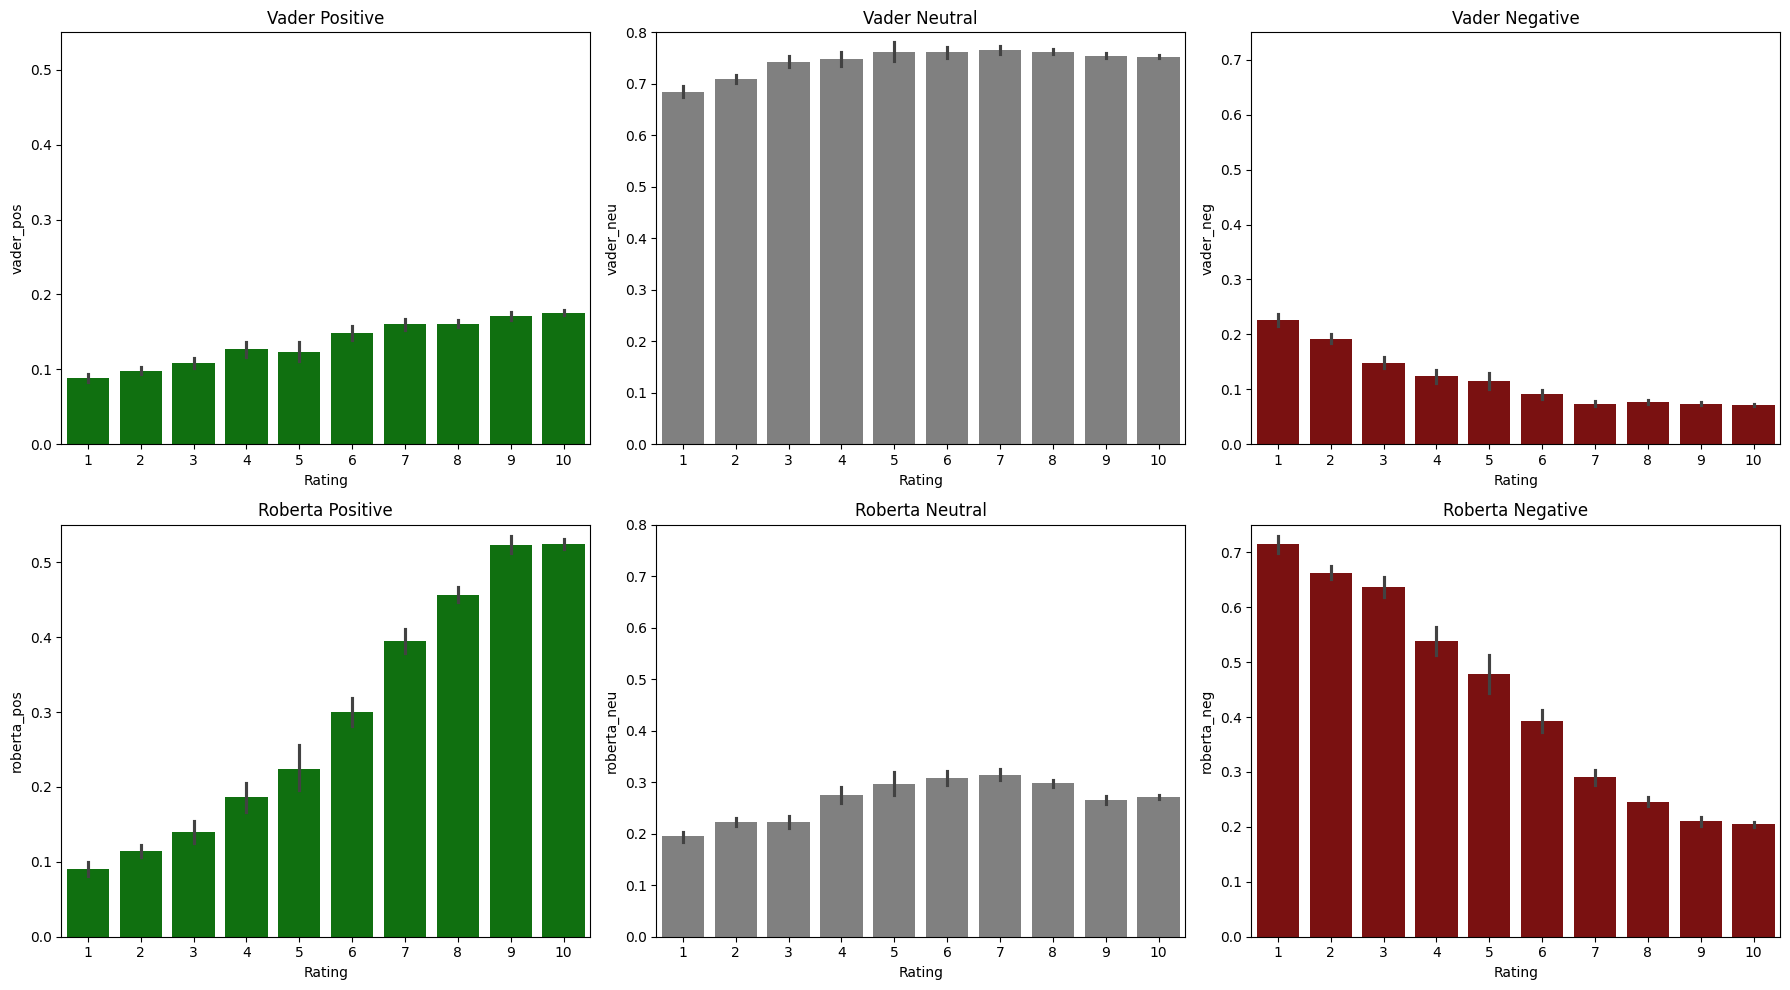

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plotting Vader Positive
sns.barplot(data=res3, x='Rating', y='vader_pos', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Vader Positive')
axs[0, 0].set_ylim(0, 0.55)

# Plotting Vader Neutral
sns.barplot(data=res3, x='Rating', y='vader_neu', ax=axs[0, 1], color='gray')
axs[0, 1].set_title('Vader Neutral')
axs[0, 1].set_ylim(0, 0.8)

# Plotting Vader Negative
sns.barplot(data=res3, x='Rating', y='vader_neg', ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Vader Negative')
axs[0, 2].set_ylim(0, 0.75)

# Plotting Roberta Positive
sns.barplot(data=res3, x='Rating', y='roberta_pos', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Roberta Positive')
axs[1, 0].set_ylim(0, 0.55)

# Plotting Roberta Neutral
sns.barplot(data=res3, x='Rating', y='roberta_neu', ax=axs[1, 1], color='gray')
axs[1, 1].set_title('Roberta Neutral')
axs[1, 1].set_ylim(0, 0.8)

# Plotting Roberta Negative
sns.barplot(data=res3, x='Rating', y='roberta_neg', ax=axs[1, 2], color='darkred')
axs[1, 2].set_title('Roberta Negative')
axs[1, 2].set_ylim(0, 0.75)

plt.tight_layout()
plt.show()

For further research, the RoBERTa model was used.

In [10]:
# the most positive reviews with rating 1
a = res3.query("Rating == 1").sort_values('roberta_pos', ascending=False)[['Review', 'roberta_pos']].values[0:30]
for i in a:
    print(i[0])

Such a thought provoking and amazing movie 🤩🤩🤩🤩🤩🤩
Lobotomy looking real good right now!!! 🤩🤩🤩
love this film very good watch
This movie was on my watchlist for a long time. I saw great ratings, and was exited to watch it.
Very epic and super cool
Great movie if you have to wake up in the morning and can’t sleep!! put on this movie you will be out in 5 minutes! best sleep i ever had.
One of the most open-ended yet beautiful films I've ever watched.
The best part was when I hung up my Chinatown poster
my dad has always LOVED the original, so when this came out we(him, me, and my sister) went to see it in theaters. no joke we ALL fell asleep. it wasn’t even a late showing, none of us were like tired from anything it was j THAT BORING.
half a star because of the lovely girl
ok i actually watched it this time and it was actually good
I bought and watched this film today for one reason, and one reason only: a woman that I really, really fancy said it was her #1 favourite film.
couldn’t even 

In [11]:
# the most negative reviews with rating 10
b = res3.query("Rating == 10").sort_values('roberta_neg', ascending=False)[['Review', 'roberta_neg', 'roberta_pos']].values[0:30]
for i in b:
    print(i[0])

You're a fucking ugly bitch. I want to stab you to death, and then play around with your blood.
You're a fucking ugly bitch. I want to stab you to death, and then play around with your blood.
You're a fucking ugly bitch. I want to stab you to death, and then play around with your blood.
This film hella fucking depressing but also hella fucking tight ngl
I wish he had killed Jean, she had a stupid look on her face the entire movie, and also that business card sucks, they should have looked for another graphic designer who could do that crap properly idc
Impeccable dialogue. Worst thing about watching this film is realizing how shallow the inhabitants of the yuppie world truly are.
“You’re a fucking ugly bitch. I wanna stab ya to death and play around with your blood.” - Patrick Bateman 
Already seems like an ancient relic due to how fucking shitty movies have become in the past 9 years.
i really want to hate fightclub, I hate people who like fightclub.
i feel like a filmbro everytime i 

## Sentiment Over Time using RoBERTa

/tmp/ipykernel_2321/4060230943.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]


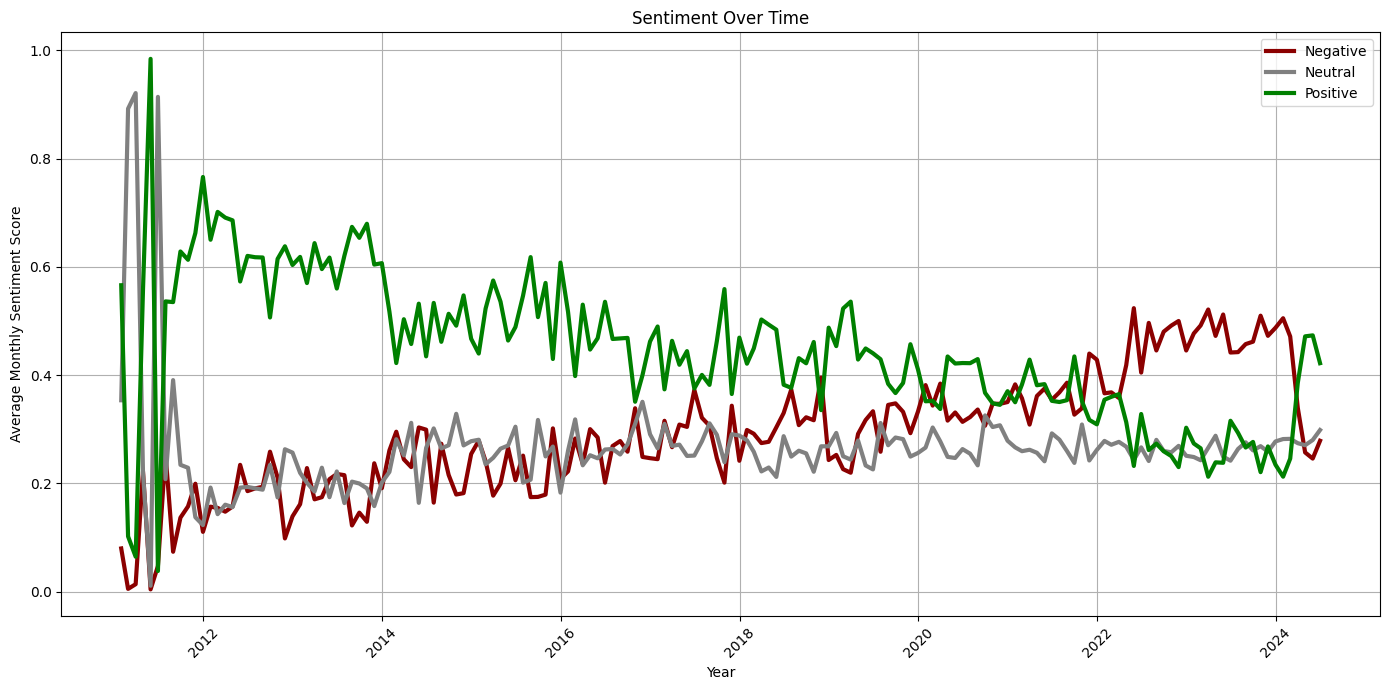

In [12]:
res3['Date'] = pd.to_datetime(res3['Date'])

monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]

plt.figure(figsize=(14, 7))

plt.plot(monthly_means.index, monthly_means['roberta_neg'], label='Negative', color='darkred', linewidth=3)
plt.plot(monthly_means.index, monthly_means['roberta_neu'], label='Neutral', color='gray', linewidth=3)
plt.plot(monthly_means.index, monthly_means['roberta_pos'], label='Positive', color='green', linewidth=3)

plt.title('Sentiment Over Time')
plt.xlabel('Year')
plt.ylabel('Average Monthly Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2321/1705653623.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]


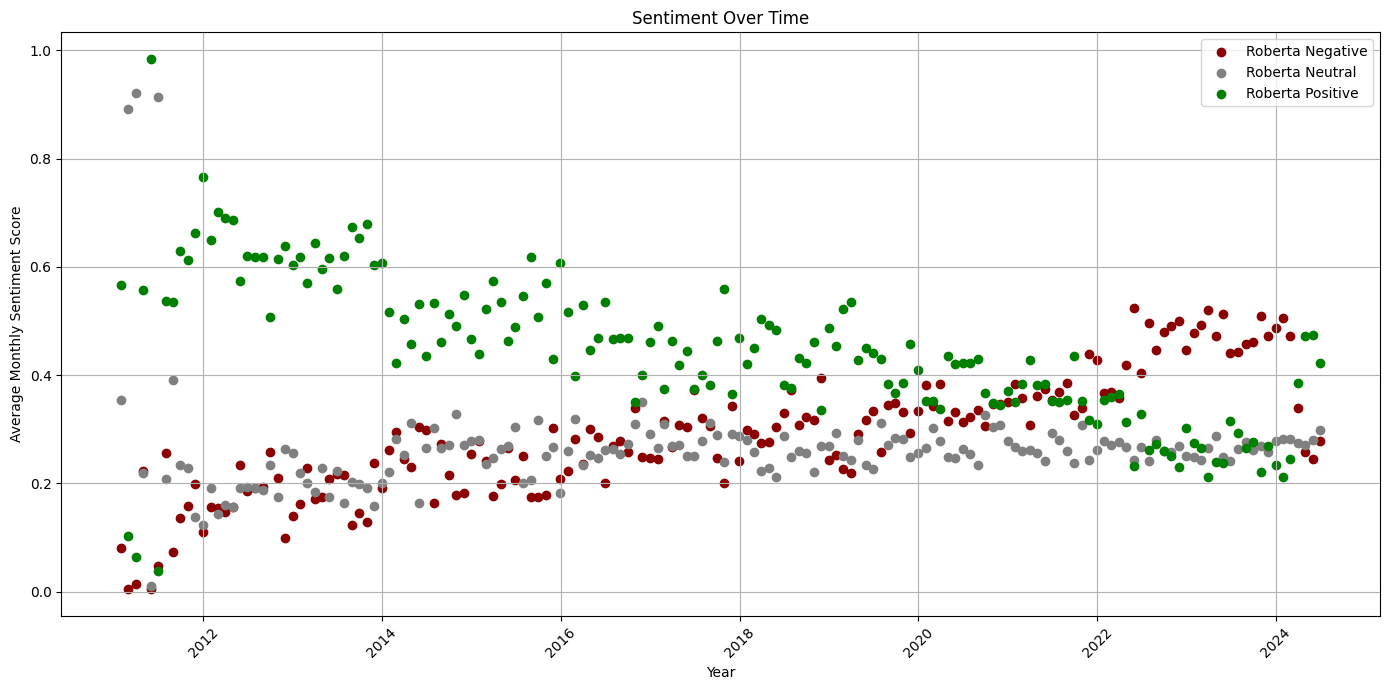

In [13]:
res3['Date'] = pd.to_datetime(res3['Date'])

monthly_means = res3.resample('M', on='Date').mean()[['roberta_neg', 'roberta_neu', 'roberta_pos']]

plt.figure(figsize=(14, 7))

plt.scatter(monthly_means.index, monthly_means['roberta_neg'], label='Roberta Negative', color='darkred')
plt.scatter(monthly_means.index, monthly_means['roberta_neu'], label='Roberta Neutral', color='gray')
plt.scatter(monthly_means.index, monthly_means['roberta_pos'], label='Roberta Positive', color='green')

plt.title('Sentiment Over Time')
plt.xlabel('Year')
plt.ylabel('Average Monthly Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Google Trends for "literally me", "sigma male", "sigma movies"

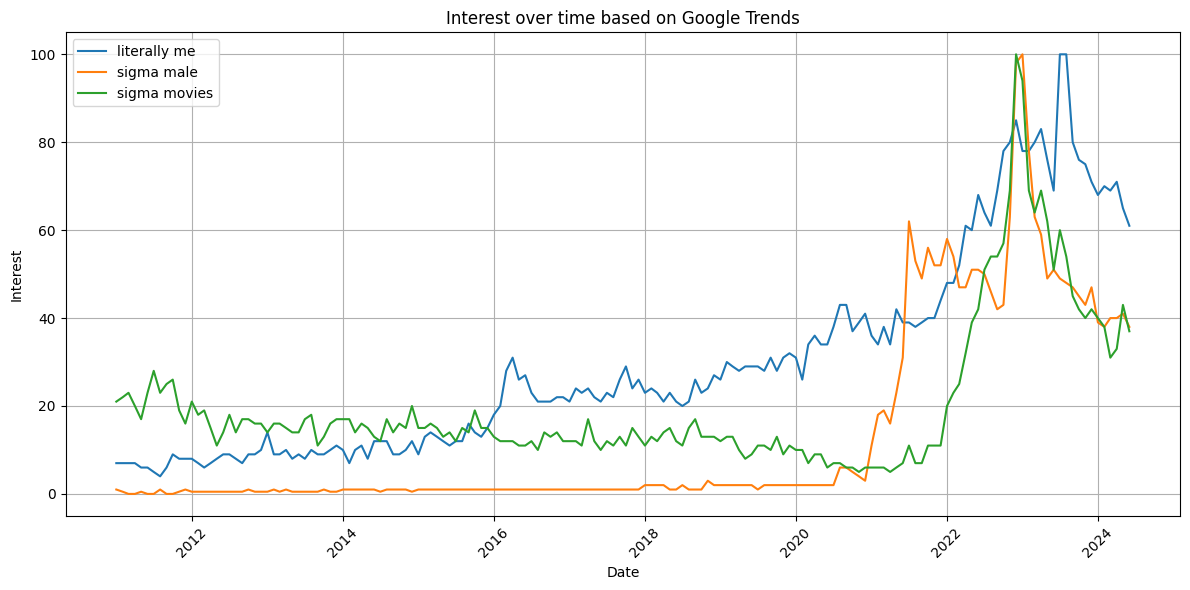

In [33]:
directory = './google_data'
files = ['literally_me.csv', 'sigma_male.csv', 'sigma_movies.csv']

# Initialize a dictionary to store dataframes
data = {}

# Read each file into a dataframe and store in the dictionary
for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    # Ensure the 'number' column is numeric
    # df['number'] = pd.to_numeric(df['number'], errors='coerce')
    df['number'] = df['number'].replace('<1', 0.5).astype(float)
    data[file] = df

# Plot the data
plt.figure(figsize=(12, 6))

for file, df in data.items():
    # Extract the name without extension for the label
    label = file.split('.')[0].replace('_', ' ')
    # Convert the date column to datetime
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
    # print(df['number'])
    # Plot the data
    plt.plot(df['date'], df['number'], label=label)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Interest')
plt.title('Interest over time based on Google Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Sentiment Analysis Comparison: 2011 - 2021 vs. 2022 - 2024
using RoBERTa model

In [14]:
res3['Year'] = res3['Date'].dt.year

df_before = res3[res3['Year'] <= 2021].copy()
df_after = res3[res3['Year'] >= 2022].copy()


print("Rows count for reviews before 2022:")
print(df_before.shape[0])

print("\nRows count for reviews since 2022:")
print(df_after.shape[0])

Rows count for reviews before 2022:
12341

Rows count for reviews since 2022:
20139


In [15]:
reviews_before = df_before['Review'].str.cat(sep=' ')
reviews_after = df_after['Review'].str.cat(sep=' ')

print("Length of concatenated reviews before 2022:", len(reviews_before))
print("Length of concatenated reviews since 2022:", len(reviews_after))

Length of concatenated reviews before 2022: 2134128
Length of concatenated reviews since 2022: 2167232


In [16]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [17]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

words_before = tokenizer.tokenize(reviews_before.lower())

print("before 2022 =====================")
print("Word count after tokenization:", len(words_before))

filtered_before = [word for word in words_before if word not in stop_words]
lem_before = [lemmatizer.lemmatize(word) for word in filtered_before]
print("Word count after removing stopwords and lemmatization:", len(lem_before))

print("\nsince 2022 ======================")
words_after = tokenizer.tokenize(reviews_after.lower())
print("Word count after tokenization:", len(words_after))

filtered_after = [word for word in words_after if word not in stop_words]
lem_after = [lemmatizer.lemmatize(word) for word in filtered_after]
print("Word count after removing stopwords and lemmatization:", len(lem_after))


before 2022 =====================
Word count after tokenization: 392782
Word count after removing stopwords and lemmatization: 201101

since 2022 ======================
Word count after tokenization: 408906
Word count after removing stopwords and lemmatization: 209026


In [291]:
fd_before = FreqDist(lem_before)
fd_after = FreqDist(lem_after)
fds = [ fd_before, fd_after ]
years = ['before', 'after']
years_range = ['2011 - 2021', '2022 - 2024']

# Words to calculate frequency for
words = ['literally', 'sigma', 'alone', 'lonely', 'loneliness', 'suffer', 'male', 'masculinity', 'crisis', 'bro']

# Create a list to store results
df = pd.DataFrame(columns=years_range, index=words)

# Populate the DataFrame with frequencies
for i, fd in enumerate(fds):
    year_range = years_range[i]
    for word in words:
        if word in fd:
            frequency = fd[word] / len(eval(f'lem_{years[i]}')) * 100
        else:
            frequency = 0
        df.at[word, year_range] = frequency

vals = []
for word, row in df.iterrows():
    if row[0] != 0:
        val = round(row[1] / row[0], 2)
    else:
        val = "started occuring"
    vals.append(val)

df['Ratio'] = vals

df

,2011 - 2021,2022 - 2024,Ratio
literally,0.082546,0.370767,4.49
sigma,0.002984,0.132041,44.26
alone,0.029338,0.036838,1.26
lonely,0.007459,0.084678,11.35
loneliness,0.005967,0.017701,2.97
suffer,0.000995,0.003349,3.37
male,0.028344,0.097117,3.43
masculinity,0.042267,0.048319,1.14
crisis,0.004475,0.01196,2.67
bro,0.024366,0.112426,4.61


values in 2011-2019 and 2020-2024 are displayed in percentages

## Most Common Words

whole set

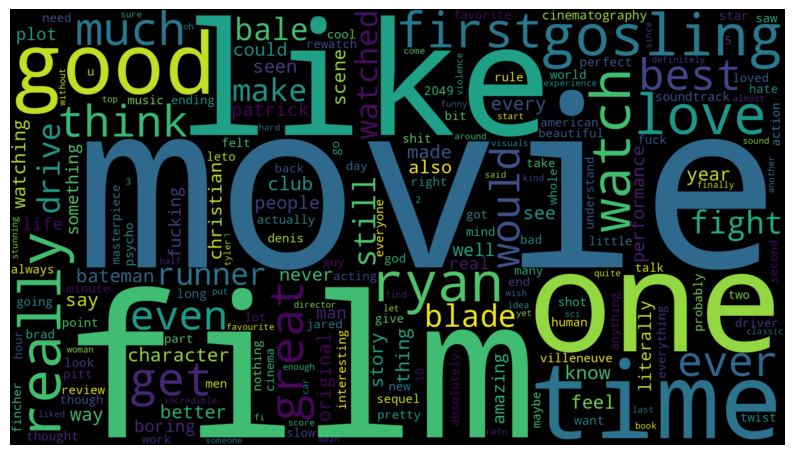

In [331]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1920, height=1080, background_color='black', margin=5).generate_from_frequencies(fd_before + fd_after)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

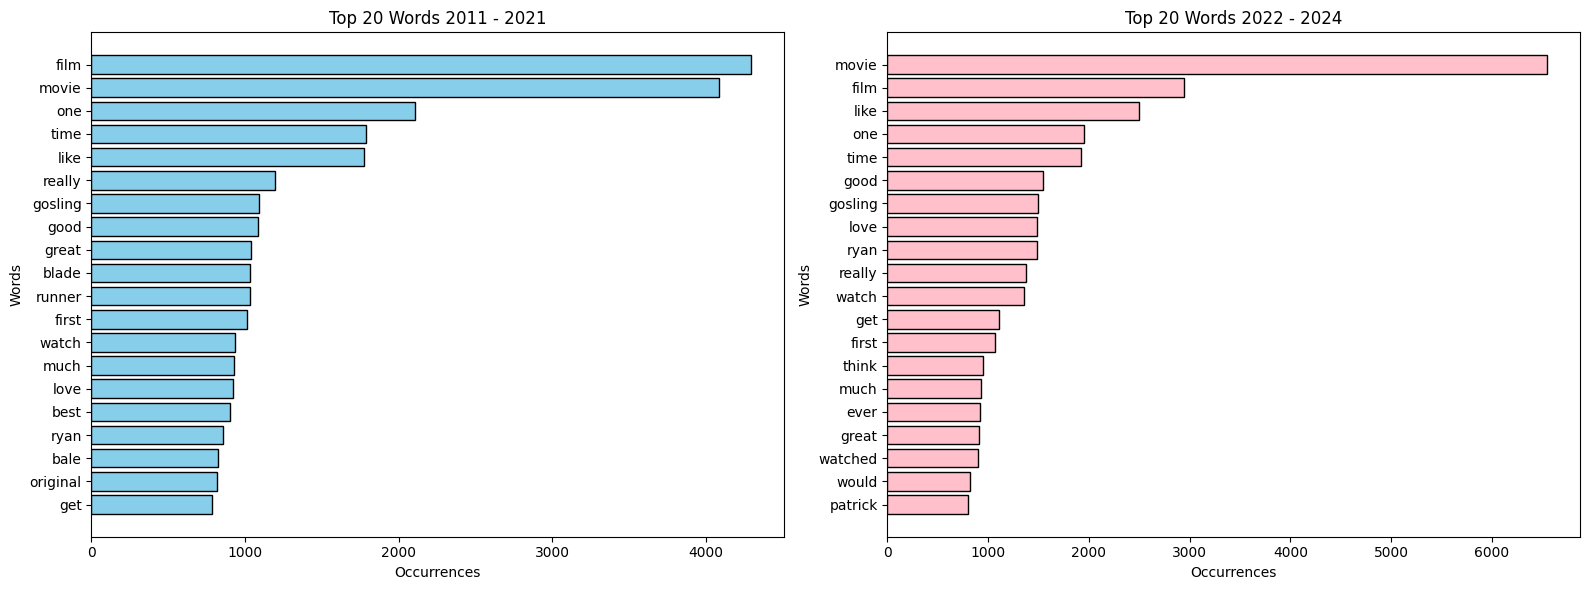

In [314]:
n = 20
most_common_before = fd_before.most_common(n)
most_common_after = fd_after.most_common(n)
words_before, counts_before = zip(*most_common_before)
words_after, counts_after = zip(*most_common_after)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(words_before, counts_before, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Occurrences')
axes[0].set_ylabel('Words')
axes[0].set_title('Top 20 Words 2011 - 2021')
axes[0].invert_yaxis()

axes[1].barh(words_after, counts_after, color='pink', edgecolor='black')
axes[1].set_xlabel('Occurrences')
axes[1].set_ylabel('Words')
axes[1].set_title('Top 20 Words 2022 - 2024')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

Word Clouds before and after

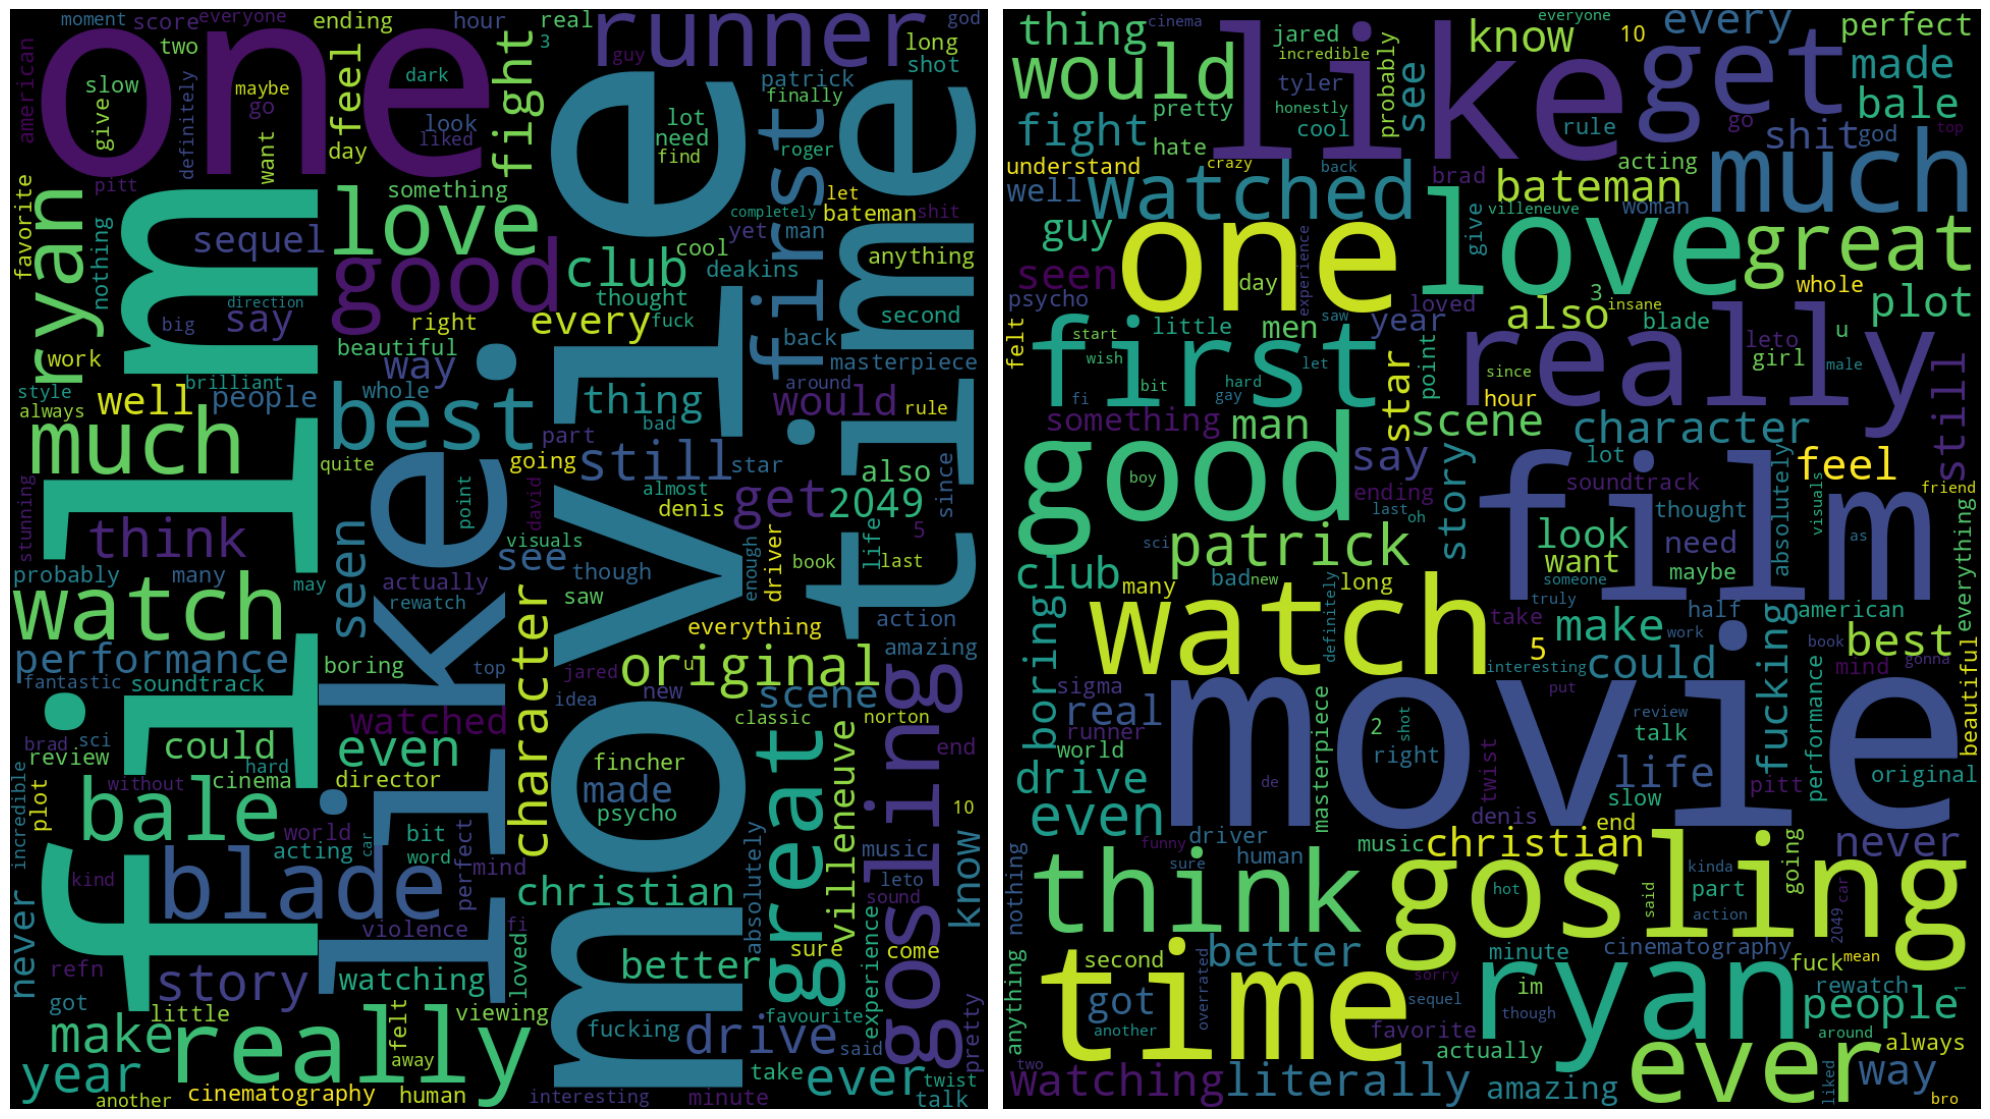

In [316]:
wordcloud_before = WordCloud(width=960, height=1080).generate_from_frequencies(fd_before)
wordcloud_after = WordCloud(width=960, height=1080).generate_from_frequencies(fd_after)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))

axes[0].imshow(wordcloud_before, interpolation='bilinear')
axes[0].axis('off')
# axes[0].set_title('Word Cloud 2011 - 2021')

axes[1].imshow(wordcloud_after, interpolation='bilinear')
axes[1].axis('off')
# axes[1].set_title('Word Cloud 2022 - 2024')

plt.tight_layout()
plt.show()

### Word Cloud after removing the most common words

The Word Clouds and bar plots do not differ significantly from each other, so modifications were made. For both datasets (pre-2022 and post-2022), the top 200 most common words were separately identified. Then, overlapping words between the sets were identified (165 words) and removed. Based on this, the following plots were generated.

165
{'best', 'end', 'car', 'interesting', 'thing', 'want', '2049', 'slow', 'something', 'villeneuve', 'runner', 'one', 'christian', 'watched', 'back', 'real', 'shit', 'soundtrack', 'performance', 'jared', 'amazing', 'everyone', 'around', 'review', 'great', 'denis', 'well', 'bateman', 'fucking', 'incredible', 'mind', '3', 'driver', 'cinema', 'top', 'look', 'god', 'think', 'watch', 'whole', 'anything', 'never', 'talk', 'pretty', 'love', 'good', 'ever', 'actually', 'seen', 'long', 'acting', 'first', 'favorite', 'human', 'see', 'rewatch', 'sci', 'shot', 'movie', '5', 'cinematography', 'sequel', 'book', 'people', 'new', 'american', 'bit', 'second', 'right', 'saw', 'probably', 'definitely', 'know', 'take', 'always', 'little', 'would', 'loved', 'blade', 'going', 'make', 'work', 'like', 'action', 'watching', 'much', 'scene', 'two', 'twist', 'film', 'character', 'said', 'patrick', 'cool', 'part', 'rule', 'since', 'ryan', 'really', 'man', 'guy', 'pitt', 'every', 'visuals', 'felt', 'feel', 'perfe

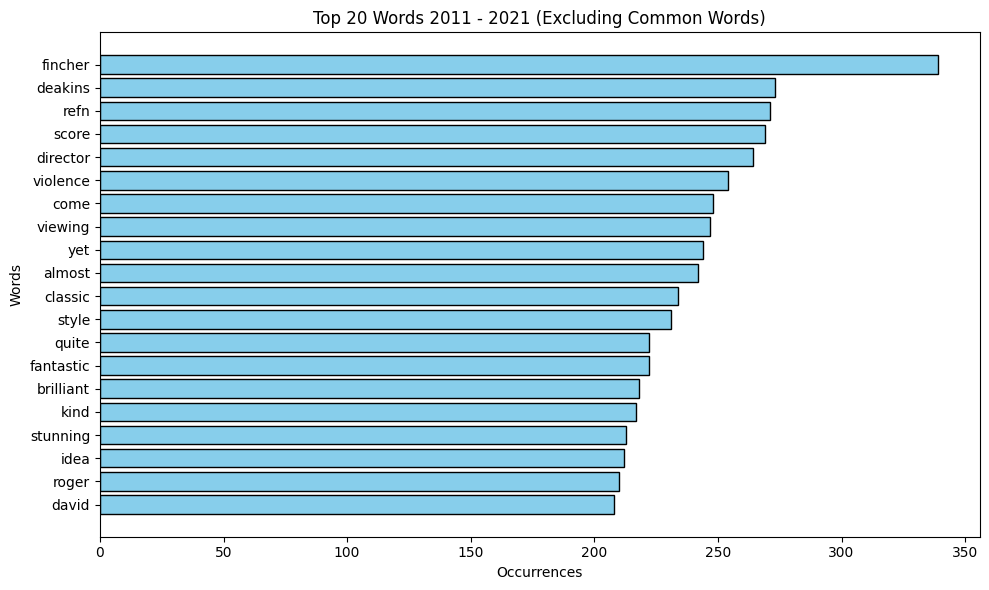

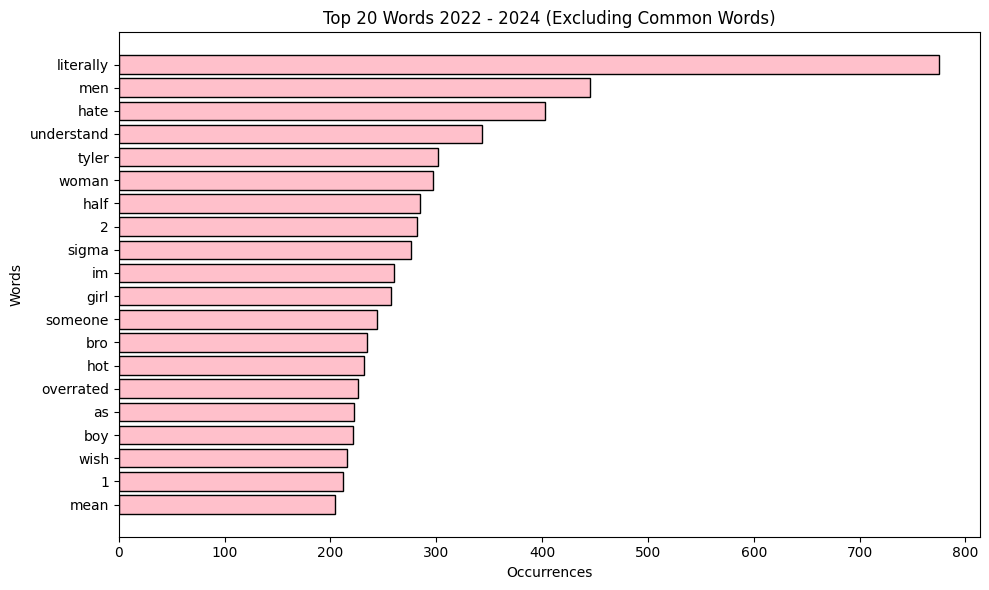

In [326]:
n = 200
most_common_before = fd_before.most_common(n)
most_common_after = fd_after.most_common(n)

# Extract the words from the most common tuples
words_before, counts_before = zip(*most_common_before)
words_after, counts_after = zip(*most_common_after)

# Find common words
common_words = set(words_before) & set(words_after)
print(len(common_words))
print(common_words)

new_before = FreqDist({word: fd_before[word] for word in fd_before if word not in common_words})
new_after = FreqDist({word: fd_after[word] for word in fd_after if word not in common_words})

top_words_before = new_before.most_common(20)
top_words_after = new_after.most_common(20)

words_before, counts_before = zip(*top_words_before)
words_after, counts_after = zip(*top_words_after)

plt.figure(figsize=(10, 6))
plt.barh(words_before, counts_before, color='skyblue', edgecolor='black')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Top 20 Words 2011 - 2021 (Excluding Common Words)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Drugi wykres dla danych po
plt.figure(figsize=(10, 6))
plt.barh(words_after, counts_after, color='pink', edgecolor='black')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Top 20 Words 2022 - 2024 (Excluding Common Words)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

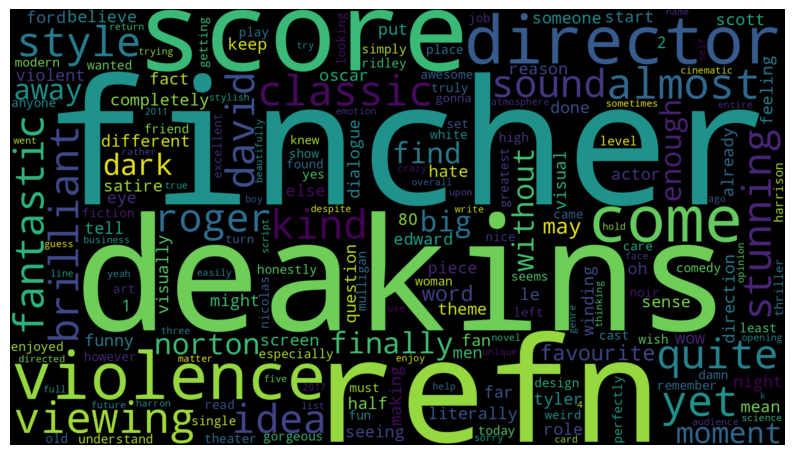

In [332]:
wordcloud1 = WordCloud(width=1920, height=1080, margin=5, background_color='black').generate_from_frequencies(new_before)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

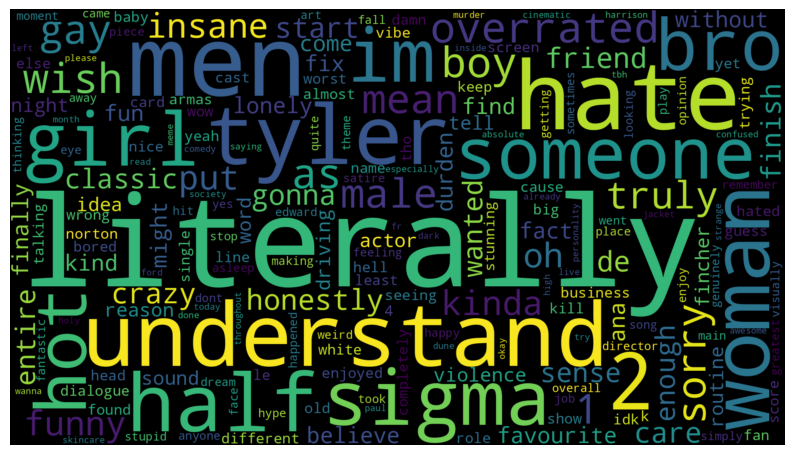

In [344]:
wordcloud2 = WordCloud(width=1920, height=1080, margin=5, background_color='black').generate_from_frequencies(new_after)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusions

The popularity of the 'literally me' trope is reflected in the reviews by Letterboxd users.

1. RoBERTa model demonstrated improved sentiment classification based on user ratings, indicating a shift towards more negative sentiments over the trend period.
2. There has been a noticeable transition from using 'film' to predominantly 'movie,' suggesting a shift in the seriousness of reviews on Letterboxd.
3. Keywords specific to the 'literally me' trope are notably more prevalent in recent reviews, underscoring their increasing usage in contemporary critiques.
4. RoBERTa exhibited superior sentiment recognition compared to Vader.
5. The review sentiment is consistent with the star rating
